#### Collecting data API

In [27]:
import requests
import pandas as pd

baseurl = "https://data.cityofchicago.org/resource/6zsd-86xi.json"

r = requests.get(baseurl)

print(r)

<Response [200]>


In [69]:
if r.status_code == 200:
    crime_data = r.json()

    crime_df = pd.DataFrame(crime_data)

    print(crime_df.head(2))
else:
    print("Failed to fetch data from the API.")

         id case_number                     date                  block  iucr  \
0  13414720    JH207364  2024-03-31T00:00:00.000  040XX S LAKE PARK AVE  0486   
1  13414768    JH207503  2024-03-31T00:00:00.000    047XX S INDIANA AVE  0479   

  primary_type                                      description  \
0      BATTERY                          DOMESTIC BATTERY SIMPLE   
1      BATTERY  AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY   

          location_description  arrest  domestic  ... location_zip  \
0                    APARTMENT   False      True  ...                
1  RESIDENCE - PORCH / HALLWAY   False     False  ...                

  :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
0                           1                        4301   
1                          12                       21192   

  :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
0                           2                         220   
1                           4        

In [70]:
crime_df

id case_number                     date  \
0    13414720    JH207364  2024-03-31T00:00:00.000   
1    13414768    JH207503  2024-03-31T00:00:00.000   
2    13414654    JH207422  2024-03-31T00:00:00.000   
3    13414622    JH207446  2024-03-31T00:00:00.000   
4    13414593    JH207397  2024-03-31T00:00:00.000   
..        ...         ...                      ...   
995  13413081    JH205438  2024-03-29T11:07:00.000   
996  13413767    JH206254  2024-03-29T11:05:00.000   
997  13413067    JH205456  2024-03-29T11:05:00.000   
998  13413808    JH205475  2024-03-29T11:04:00.000   
999  13413060    JH205482  2024-03-29T11:02:00.000   

                                   block  iucr         primary_type  \
0                  040XX S LAKE PARK AVE  0486              BATTERY   
1                    047XX S INDIANA AVE  0479              BATTERY   
2                      008XX N LAMON AVE  041A              BATTERY   
3                        033XX W 38TH PL  0910  MOTOR VEHICLE THEFT   
4                        012XX W 59TH ST  0930  MOTOR VEHICLE THEFT   
..                                   ...   ...                  ...   
995                   017XX N PAULINA ST  0560              ASSAULT   
996                090XX S PRINCETON AVE  1310      CRIMINAL DAMAGE   
997                  073XX S ASHLAND AVE  0860                THEFT   
998  065XX S DR MARTIN LUTHER KING JR DR  051A              ASSAULT   
999                      0000X W 95TH ST  502R        OTHER OFFENSE   

                                         description  \
0                            DOMESTIC BATTERY SIMPLE   
1    AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY   
2                               AGGRAVATED - HANDGUN   
3                                         AUTOMOBILE   
4                      THEFT / RECOVERY - AUTOMOBILE   
..                                               ...   
995                                           SIMPLE   
996                                      TO PROPERTY   
997                                     RETAIL THEFT   
998                             AGGRAVATED - HANDGUN   
999             VEHICLE TITLE / REGISTRATION OFFENSE   

                       location_description  arrest  domestic  ...  \
0                                 APARTMENT   False      True  ...   
1               RESIDENCE - PORCH / HALLWAY   False     False  ...   
2                                  SIDEWALK   False     False  ...   
3                                     ALLEY   False     False  ...   
4                                    STREET   False     False  ...   
..                                      ...     ...       ...  ...   
995  PARKING LOT / GARAGE (NON RESIDENTIAL)    True     False  ...   
996                               RESIDENCE   False      True  ...   
997                      SMALL RETAIL STORE    True     False  ...   
998                               APARTMENT   False     False  ...   
999                                  STREET   False     False  ...   

    location_zip :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
0                                          1                        4301   
1                                         12                       21192   
2                                          4                        4299   
3                                         29                       22248   
4                                         19                       22257   
..           ...                         ...                         ...   
995                                       16                       21560   
996                                       18                       21554   
997                                       17                       22257   
998                                       53                       22260   
999                                       18                       21861   

    :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
0                  

#### Preprocessing

In [71]:
crime_df.dtypes

id                             object
case_number                    object
date                           object
block                          object
iucr                           object
primary_type                   object
description                    object
location_description           object
arrest                           bool
domestic                         bool
beat                           object
district                       object
ward                           object
community_area                 object
fbi_code                       object
x_coordinate                   object
y_coordinate                   object
year                           object
updated_on                     object
latitude                       object
longitude                      object
location                       object
location_address               object
location_city                  object
location_state                 object
location_zip                   object
:@computed_r

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'date' is the column containing the date and time
# Convert the 'date' column to datetime format first
new_crime_df['date'] = pd.to_datetime(new_crime_df['date'])

# Separate date and time into new columns
new_crime_df['date_only'] = new_crime_df['date'].dt.date
new_crime_df['time_only'] = new_crime_df['date'].dt.time




In [72]:
import pandas as pd

# Assuming df is your DataFrame and 'date' is the column containing the date and time
# Convert the 'date' column to datetime format first
crime_df['date'] = pd.to_datetime(crime_df['date'])

# Separate date and time into new columns
crime_df['date_only'] = crime_df['date'].dt.date
crime_df['time_only'] = crime_df['date'].dt.time


In [73]:
crime_df.dropna(inplace=True)

In [74]:
crime_df.drop(columns=[":@computed_region_8hcu_yrd4", ":@computed_region_d3ds_rm58", ":@computed_region_d9mm_jgwp", ":@computed_region_rpca_8um6", ":@computed_region_43wa_7qmu", ":@computed_region_bdys_3d7i", ":@computed_region_vrxf_vc4k", ":@computed_region_6mkv_f3dw"], inplace=True)


In [75]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward',
    'community_area', 'fbi_code', 'year',
    'updated_on', 'latitude', 'longitude', 'location_address',
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64',
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address        string[python]
location_city           string[python]
location_state          string[python]
location_zip            string[python]
dtype: object


In [76]:
new_crime_df.drop(columns=['location_address', 'location_city', 'location_state', 'location_zip'], inplace=True)

#### Visualization

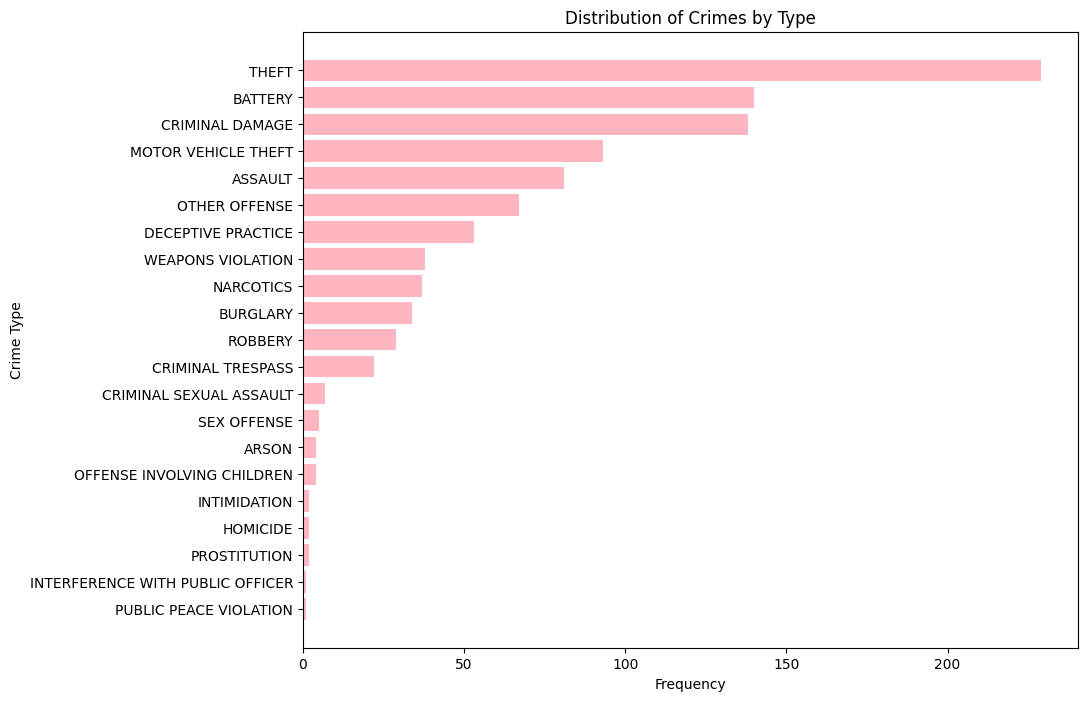

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
crime_type_counts = new_crime_df['primary_type'].value_counts()
crime_type_counts_sorted = crime_type_counts.sort_values(ascending=True)  # Sort the counts in ascending order

plt.barh(crime_type_counts_sorted.index, crime_type_counts_sorted.values, color='lightpink')
plt.title('Distribution of Crimes by Type')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()


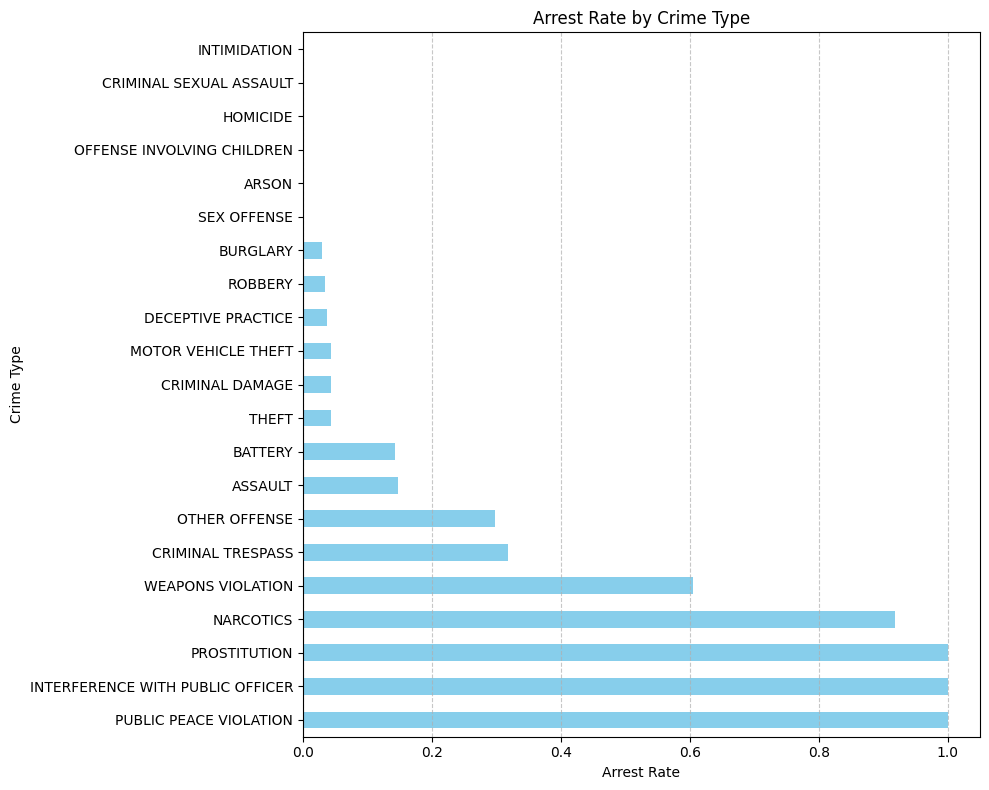

In [ ]:
plt.figure(figsize=(10, 8))
arrest_rate = new_crime_df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False)
arrest_rate.plot(kind='barh', color='skyblue')
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import folium
# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add crime locations as circle markers to the map
for index, row in new_crime_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        fill=True,
        fill_opacity=0.6,
        color='red',
        fill_color='red',
        tooltip=f"{row['primary_type']}: {row['description']}"
    ).add_to(chicago_map)

# Display the map
chicago_map


In [ ]:
import folium
from folium.plugins import HeatMap

crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

heat_data = new_crime_df[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(crime_map)

crime_map

In [ ]:
import folium

crime_types = ['ASSAULT', 'THEFT', 'BATTERY']

chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

colors = {'ASSAULT': 'red', 'THEFT': 'blue', 'BATTERY': 'green'}

for crime_type in crime_types:
    crime_df = new_crime_df[new_crime_df['primary_type'] == crime_type]
    for index, row in crime_df.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            fill=True,
            fill_opacity=0.6,
            color=colors[crime_type],
            fill_color=colors[crime_type],
            tooltip=f"{row['primary_type']}: {row['description']}"
        ).add_to(chicago_map)

chicago_map


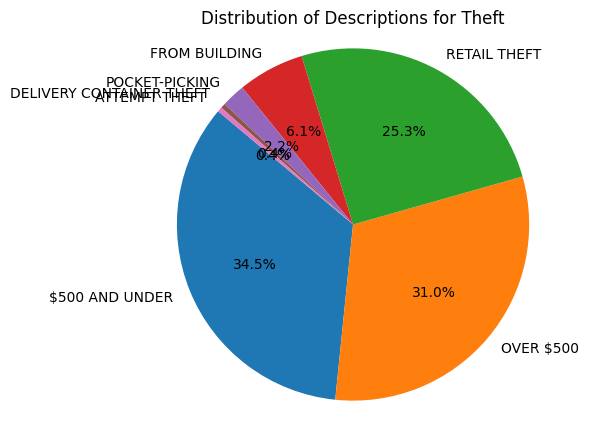

In [ ]:
import matplotlib.pyplot as plt
theft_df = new_crime_df[new_crime_df['primary_type'] == 'THEFT']

description_counts = theft_df['description'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(description_counts, labels=description_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Descriptions for Theft')
plt.axis('equal')
plt.show()


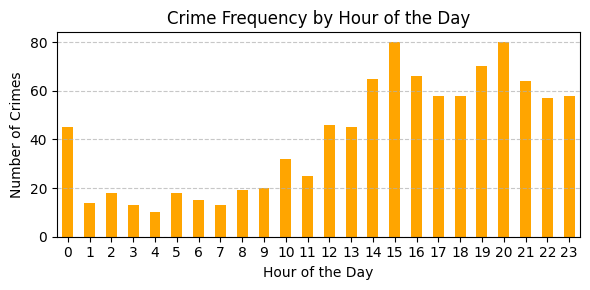

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

new_crime_df['hour_of_day'] = new_crime_df['date'].dt.hour

# Plotting crime frequency by hour of the day
plt.figure(figsize=(6, 3))
new_crime_df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Crime Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-20-046911f23dfa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_count_by_community.index, y=crime_count_by_community.values, palette='husl')


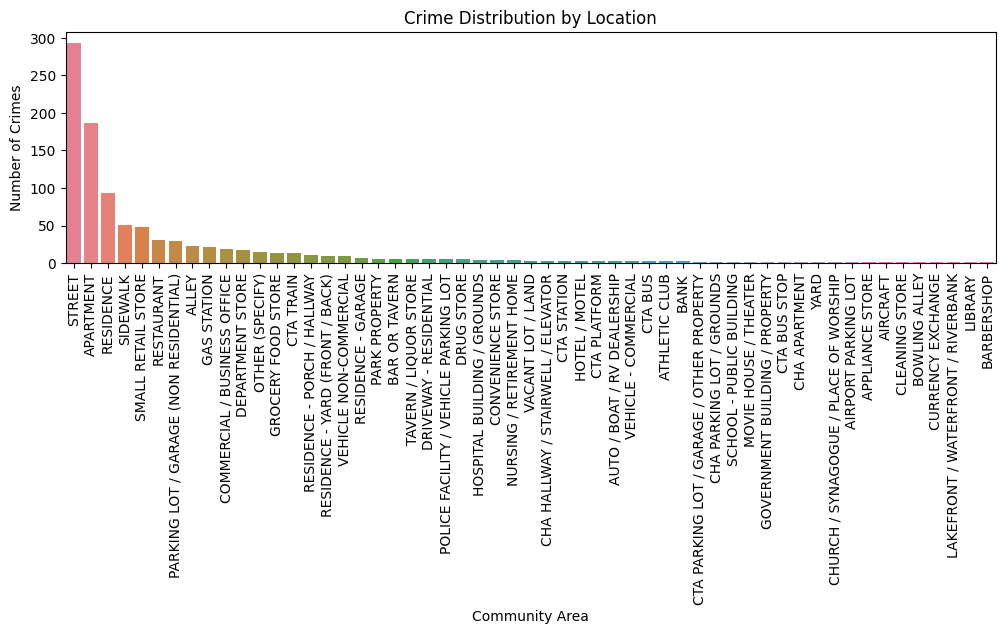

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_count_by_community = new_crime_df['location_description'].value_counts()

# Plotting crime distribution by community area
plt.figure(figsize=(12, 3))
sns.barplot(x=crime_count_by_community.index, y=crime_count_by_community.values, palette='husl')
plt.title('Crime Distribution by Location')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()


Clustering:

- 1) Kmeans:-

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
    'latitude', 'longitude', 'arrest', 'domestic'
] + categorical_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale numerical features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Perform KMeans clustering
])

X = new_crime_df[features]

pipeline.fit(X)

cluster_labels = pipeline.named_steps['kmeans'].labels_

new_crime_df['cluster'] = cluster_labels

cluster_explanation = {
    0: "High Crime Rate Areas with frequent arrests and domestic incidents in public locations.",
    1: "Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.",
    2: "Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."
}

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


In [83]:
cluster_counts = new_crime_df['cluster'].value_counts()
print(cluster_counts)

cluster
0    478
2    256
1    247
Name: count, dtype: int64


In [79]:
import folium

# Convert latitude and longitude columns to float64
new_crime_df['latitude'] = new_crime_df['latitude'].astype('float64')
new_crime_df['longitude'] = new_crime_df['longitude'].astype('float64')

# Calculate mean latitude and longitude
mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()

mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()
crime_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

cluster_colors = ['blue', 'orange', 'black']

for index, row in new_crime_df.iterrows():
    cluster_color = cluster_colors[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color
    ).add_to(crime_map)

crime_map


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

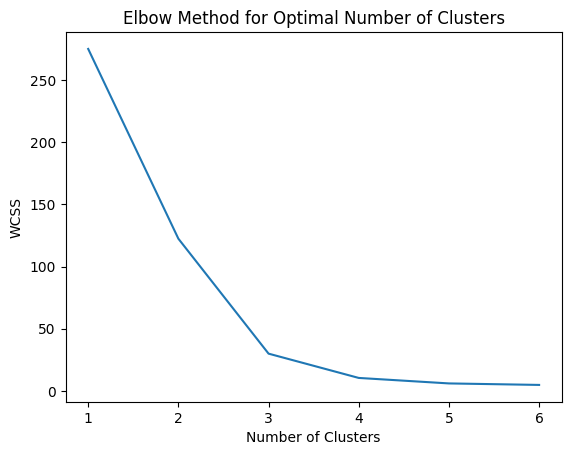

In [42]:
#Elbow method:
import matplotlib.pyplot as plt
numerical_features = ['latitude', 'longitude', 'arrest', 'domestic']

X_numerical = new_crime_df[numerical_features]

wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_numerical)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- 2) Heirarchical:

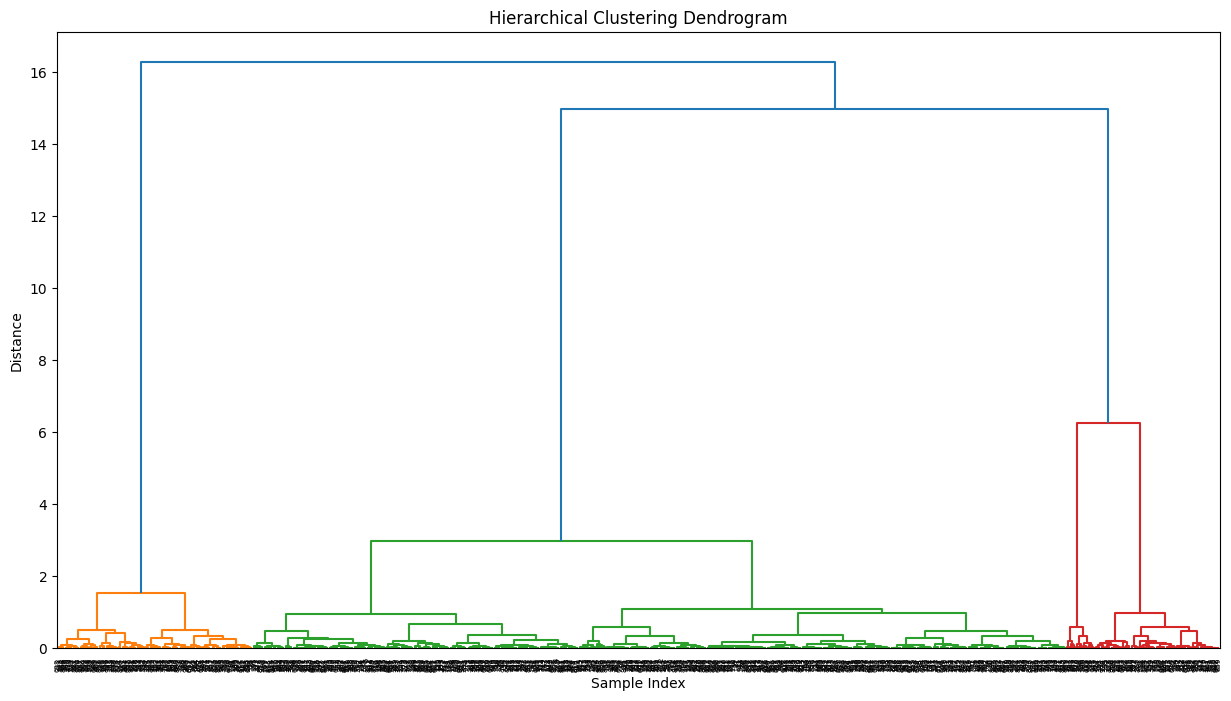

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

numerical_columns = ['latitude', 'longitude', 'arrest', 'domestic']
X_numeric = new_crime_df[numerical_columns]

Z = linkage(X_numeric, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


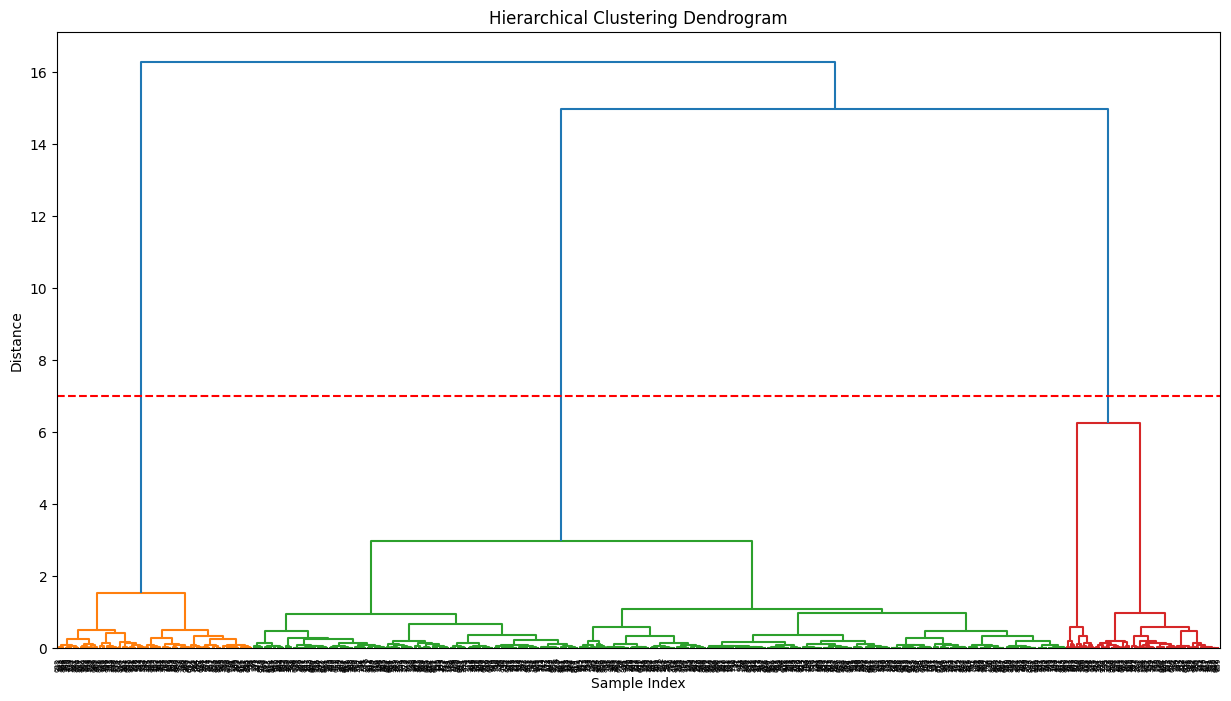

In [45]:
# Let's cut the Dendogram at level 4 to get 3 clusters for heirarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

numerical_columns = ['latitude', 'longitude', 'arrest', 'domestic']
X_numeric = new_crime_df[numerical_columns]

Z = linkage(X_numeric, method='ward')

# Plotting dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)

height = 7
plt.axhline(y=height, color='r', linestyle='--', label=f'Height = {height}')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [84]:
#Now forming actual clusters by applying agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
    'latitude', 'longitude', 'arrest', 'domestic'
] + categorical_columns  # Include categorical columns for clustering

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('agglomerative', AgglomerativeClustering(n_clusters=3))  # Performing hierarchical clustering
])

X = new_crime_df[features]

pipeline.fit(X)

# Get cluster labels
cluster_labels = pipeline.named_steps['agglomerative'].labels_

new_crime_df['cluster'] = cluster_labels

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
import folium

mean_lat = new_crime_df['latitude'].mean()
mean_lon = new_crime_df['longitude'].mean()
crime_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

cluster_colors = ['pink', 'yellow', 'red']

for index, row in new_crime_df.iterrows():
    cluster_color = cluster_colors[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color
    ).add_to(crime_map)

# Display the map
crime_map


- Performing PCA

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = ['primary_type', 'description', 'location_description']
numerical_columns = ['arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'year', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=2))
])

X = new_crime_df.drop(['id', 'case_number', 'date', 'block', 'iucr', 'fbi_code', 'updated_on', 'date_only', 'time_only'], axis=1)

X_svd = pipeline.fit_transform(X)

svd_df = pd.DataFrame(data=X_svd, columns=['SVD1', 'SVD2'])


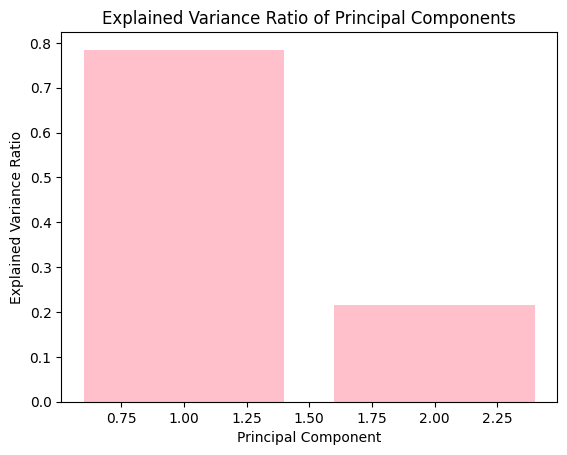

In [ ]:
import matplotlib.pyplot as plt

explained_variance = pipeline.named_steps['svd'].explained_variance_

explained_variance_ratio = explained_variance / explained_variance.sum()

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='pink')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


- #### Applying different classifier to predict our labels

Data Preperation:

In [102]:
from sklearn.preprocessing import LabelEncoder

# Filling missing values in 'arrest' and 'domestic' columns with False
new_crime_df['arrest'] = new_crime_df['arrest'].fillna(False)
new_crime_df['domestic'] = new_crime_df['domestic'].fillna(False)

# Converting 'arrest' and 'domestic' columns to boolean
new_crime_df['arrest'] = new_crime_df['arrest'].astype(bool)
new_crime_df['domestic'] = new_crime_df['domestic'].astype(bool)

# Encoding the data
label_encoder = LabelEncoder()

string_columns = ['case_number', 'block', 'iucr', 'primary_type', 'description',
                  'location_description', 'beat', 'district', 'ward',
                  'community_area', 'fbi_code', 'year']

for col in string_columns:
    new_crime_df[col] = label_encoder.fit_transform(crime_df[col])

# Now you can will proceed with splitting the data and training the classifier


In [103]:
 new_crime_df

id  case_number                date  block  iucr  primary_type  \
0    13414720          742 2024-03-31 00:00:00    490    20             2   
1    13414768          753 2024-03-31 00:00:00    553    18             2   
2    13414654          748 2024-03-31 00:00:00    139    11             2   
3    13414622          750 2024-03-31 00:00:00    427    42            13   
4    13414593          746 2024-03-31 00:00:00    196    46            13   
..        ...          ...                 ...    ...   ...           ...   
995  13413081            0 2024-03-29 11:07:00    255    30             1   
996  13413767          256 2024-03-29 11:05:00    860    59             5   
997  13413067            2 2024-03-29 11:05:00    761    38            21   
998  13413808            5 2024-03-29 11:04:00    708    25             1   
999  13413060            6 2024-03-29 11:02:00     14   101            16   

     description  location_description  arrest  domestic  beat  district  \
0             32                     5   False      True    14         1   
1              5                    43   False     False    19         1   
2              3                    48   False     False   169        13   
3             26                     4   False     False   100         8   
4             81                    51   False     False    73         6   
..           ...                   ...     ...       ...   ...       ...   
995           77                    39    True     False   161        12   
996           87                    41   False      True    70         5   
997           74                    49    True     False    84         6   
998            3                     5   False     False    27         2   
999           96                    51   False     False    70         5   

     ward  community_area  fbi_code  year          updated_on   latitude  \
0      33              29         9     0 2024-04-07 15:40:59  41.820982   
1      22              31         4     0 2024-04-07 15:40:59  41.808541   
2      30              17         4     0 2024-04-07 15:40:59  41.896164   
3       3              53         7     0 2024-04-07 15:40:59  41.823451   
4       7              63         7     0 2024-04-07 15:40:59  41.786874   
..    ...             ...       ...   ...                 ...        ...   
995    25              16         8     0 2024-04-06 15:40:50  41.914230   
996    49              43        13     0 2024-04-06 15:40:50  41.729261   
997     8              63         6     0 2024-04-06 15:40:50  41.760066   
998    12              65         3     0 2024-04-06 15:40:50  41.776002   
999    49              43        20     0 2024-04-06 15:40:50  41.721698   

     longitude  cluster  
0   -87.601400        1  
1   -87.621195        1  
2   -87.748286        1  
3   -87.707563        0  
4   -87.655550        0  
..         ...      ...  
995 -87.670231        0  
996 -87.631076        1  
997 -87.663662        2  
998 -87.615521        0  
999 -87.625345        0  

[981 rows x 20 columns]

1) Naive Bayes Classifier:

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Spliting data into features (X) and target (y)
X = new_crime_df.drop(columns=['cluster', 'date', 'updated_on'])  # Assuming 'cluster' is the target variable
y = new_crime_df['cluster']

# Spliting data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replacing negative values with zeros
X_train[X_train < 0] = 0



In [105]:
X_train.dtypes

id                        int64
case_number               int64
block                     int64
iucr                      int64
primary_type              int64
description               int64
location_description      int64
arrest                     bool
domestic                   bool
beat                      int64
district                  int64
ward                      int64
community_area            int64
fbi_code                  int64
year                      int64
latitude                float64
longitude               float64
dtype: object

In [115]:
# fitting the Naive Bayes classifier to our data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred = nb_classifier.predict(X_test)

In [116]:
# Evaluating the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[79  6 13]
 [33 14  3]
 [34  2 13]]
Accuracy: 0.5380710659898477


Let us check if applying balancing techniques will help us increase the accuracy.

In [118]:
from imblearn.over_sampling import RandomOverSampler

# Applying RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = nb_classifier.predict(X_test)

# Evaluating the classifier
conf_matrix1 = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix1)
print("Accuracy:", accuracy1)


Confusion Matrix:
 [[32 30 36]
 [ 6 31 13]
 [ 6 11 32]]
Accuracy: 0.48223350253807107


In [119]:
from imblearn.under_sampling import RandomUnderSampler

# Applying RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = nb_classifier.predict(X_test)

# Evaluating the classifier
conf_matrix2 = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix2)
print("Accuracy:", accuracy2)


Confusion Matrix:
 [[37 23 38]
 [ 7 31 12]
 [ 6  9 34]]
Accuracy: 0.5177664974619289


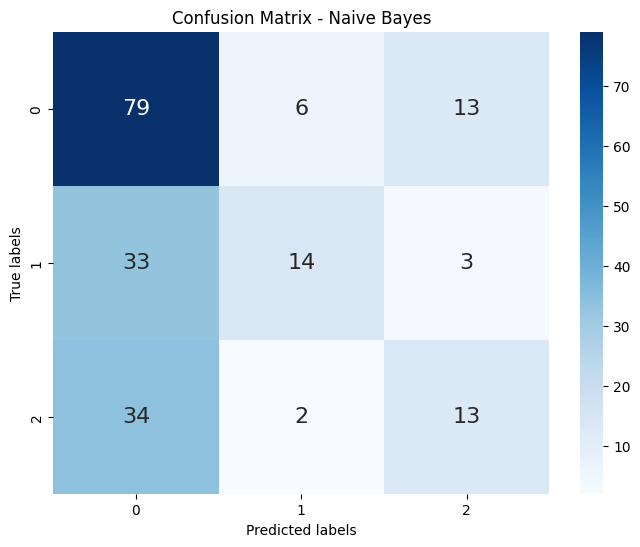

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for Naive Bayes classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


After checking both balancing techincs, conclusion is made that we do not need any of it. We are getting better accuracy withour using any of these techniqies.

2) Decision Tree Classifier:

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Spliting data into features (X) and target (y)
X = new_crime_df.drop(columns=['cluster', 'date', 'updated_on'])  # Assuming 'cluster' is the target variable
y = new_crime_df['cluster']

# Spliting data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier

# Initializing and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Decision Tree classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)

[[92  0  6]
 [ 2 48  0]
 [ 4  2 43]]
Decision Tree Accuracy: 0.9289340101522843


Applying the balancing techniques to our data

In [132]:
from imblearn.under_sampling import RandomUnderSampler

# Initializing the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Resampling the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

dt_classifier1 = DecisionTreeClassifier()
dt_classifier1.fit(X_resampled, y_resampled)

y_pred_dt = dt_classifier1.predict(X_test)

# Evaluating the Decision Tree classifier
conf_matrix_dt1 = confusion_matrix(y_test, y_pred_dt)
accuracy_dt1 = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Confusion Matrix (after undersampling):\n", conf_matrix_dt1)
print("Decision Tree Accuracy (after undersampling):", accuracy_dt1)


Decision Tree Confusion Matrix (after undersampling):
 [[90  0  8]
 [ 1 49  0]
 [ 4  1 44]]
Decision Tree Accuracy (after undersampling): 0.9289340101522843


In [130]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_resampled, y_resampled)

y_pred_dt = dt_classifier2.predict(X_test)

# Evaluate the Decision Tree classifier
conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Confusion Matrix (after oversampling):\n", conf_matrix_dt2)
print("Decision Tree Accuracy (after oversampling):", accuracy_dt2)


Decision Tree Confusion Matrix (after oversampling):
 [[92  0  6]
 [ 1 49  0]
 [ 5  1 43]]
Decision Tree Accuracy (after oversampling): 0.934010152284264


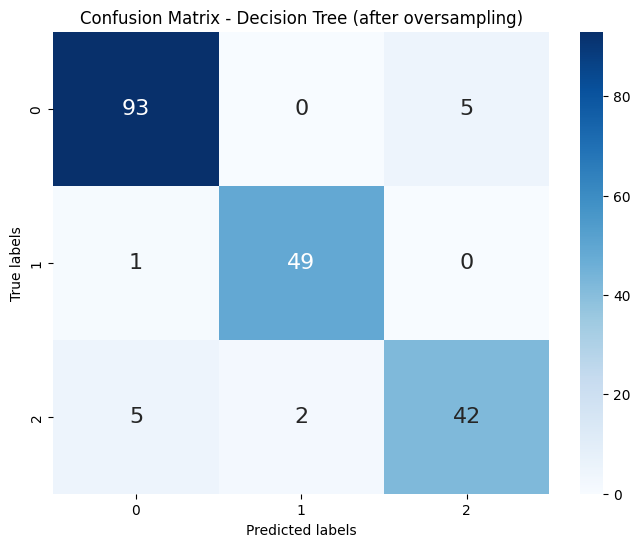

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for Decision Tree classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt2, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree (after oversampling)')
plt.show()


As we can see after applying both the classifiers, it is evident that Decision tree is better fir on our data as it is giving better accuracy that NB. Moreover, after applying Oversampling technique, the accuracy even incresed from 88% to 91%.   

Now, let's visualize the results

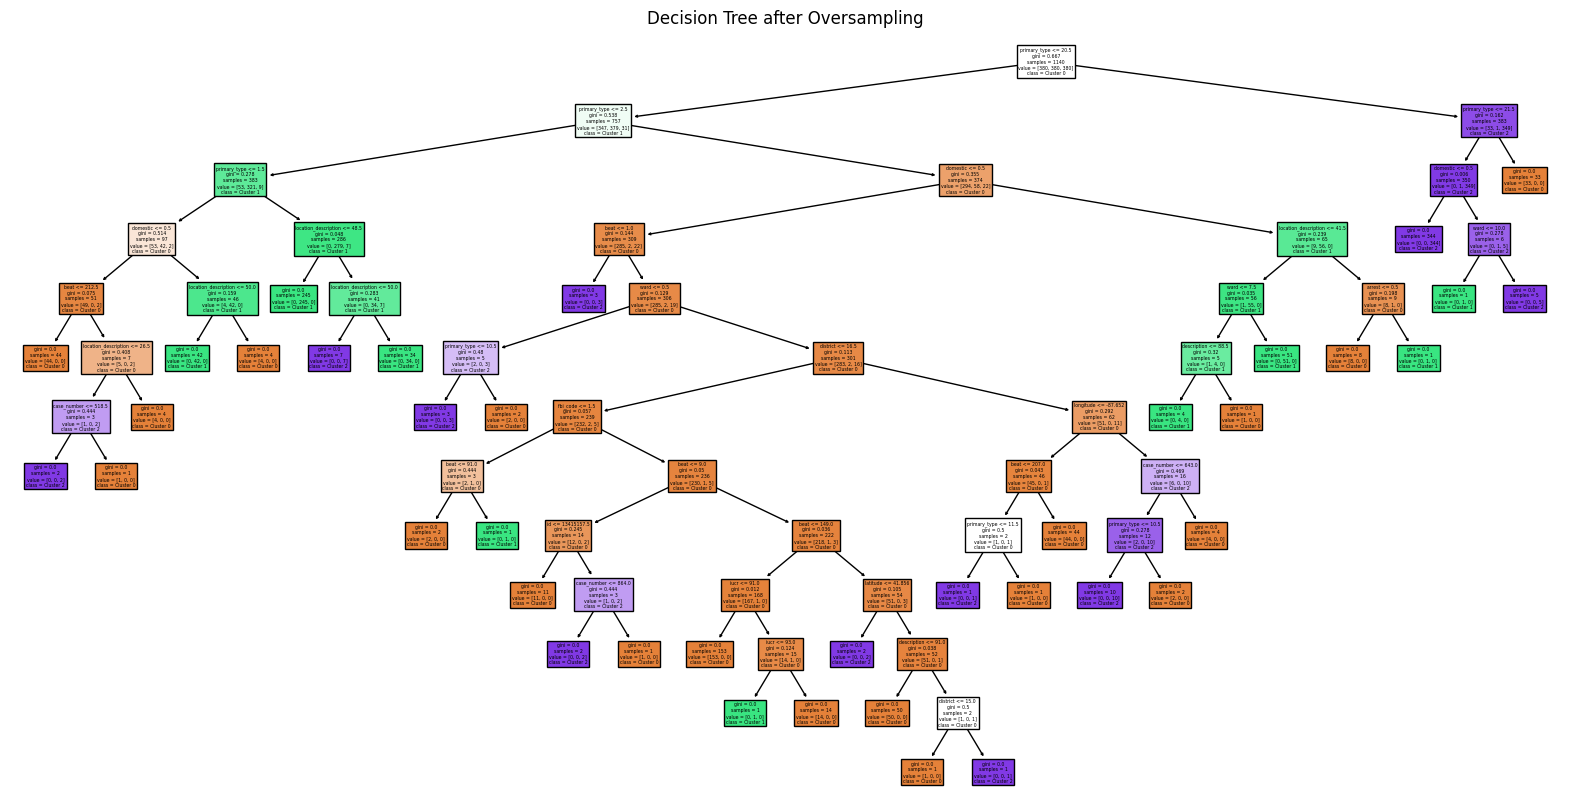

In [136]:
from sklearn.tree import plot_tree

# Plotting the decision tree with oversampling
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier2, filled=True, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Decision Tree after Oversampling')
plt.show()


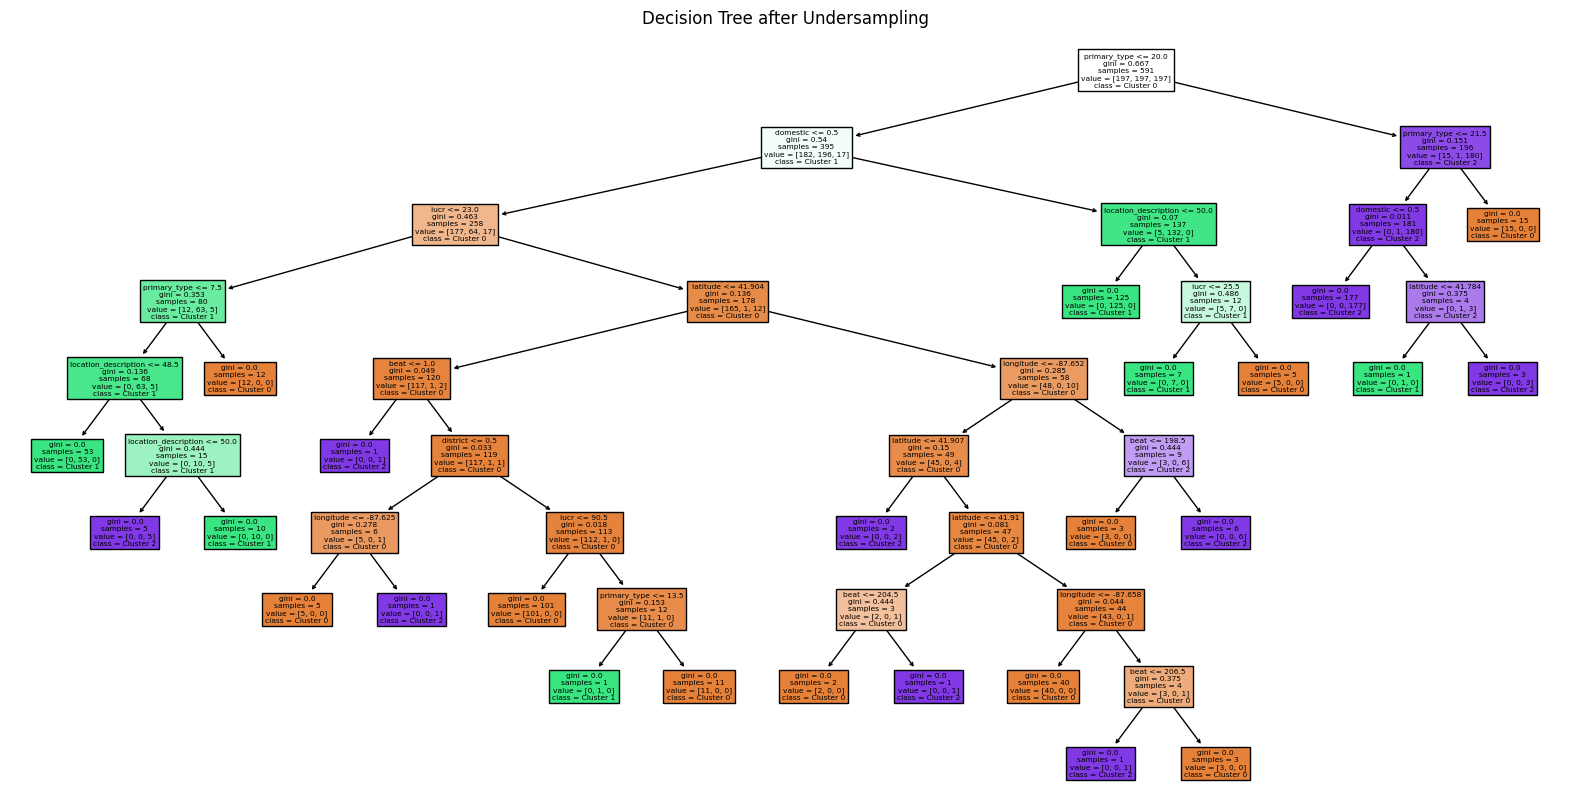

In [134]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree with undersampling
plt.figure(figsize=(20,10))
plot_tree(dt_classifier1, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.title('Decision Tree after Undersampling')
plt.show()


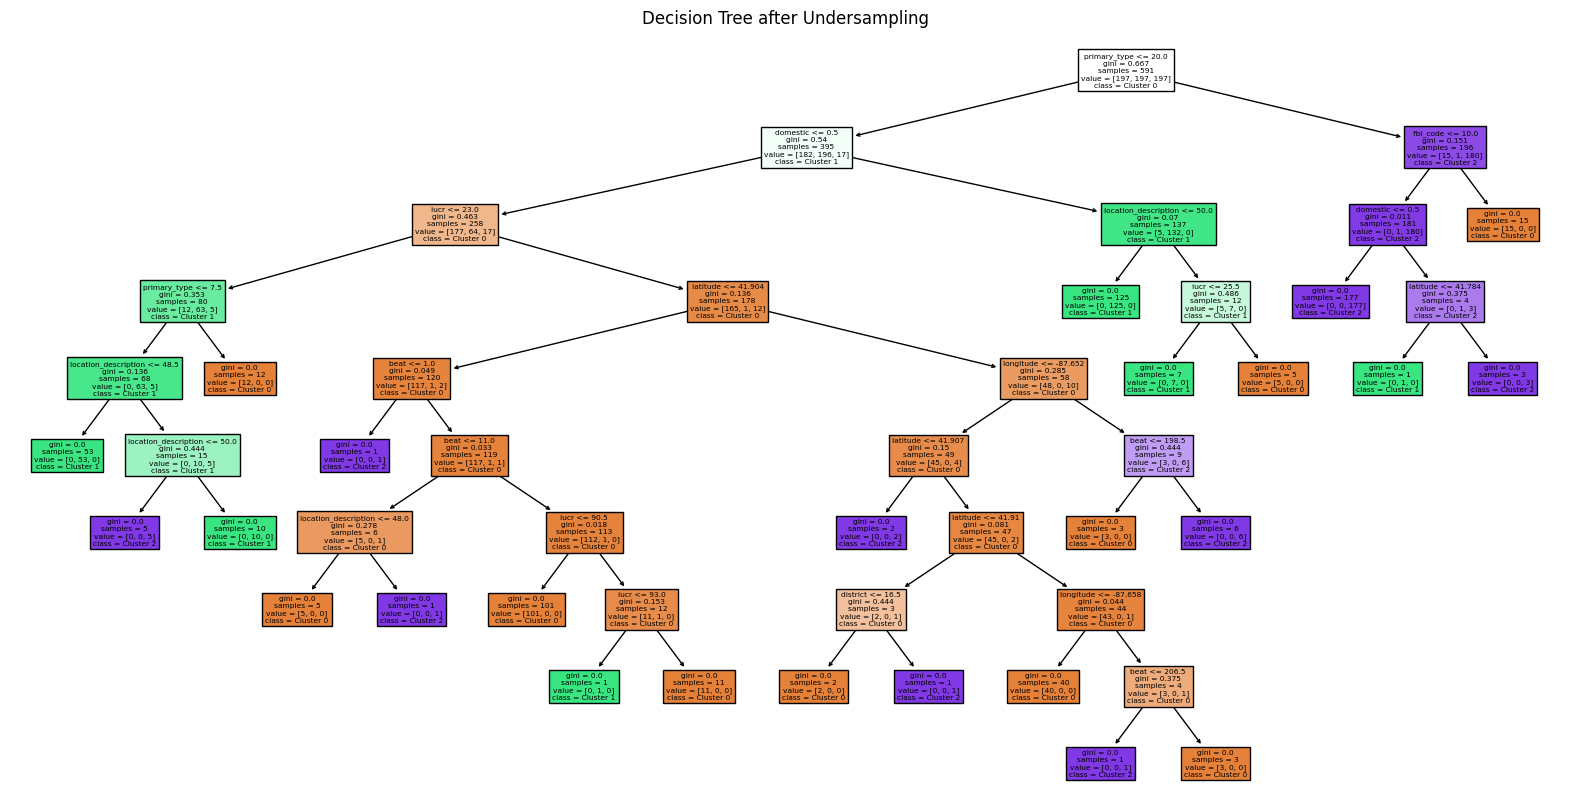

In [135]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the Original decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.title('The Original Decision Tree')
plt.show()